# Quiz-MA

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"

df = pd.read_csv(url)

df.head(5)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [2]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 730
Shape of the data frame is (365, 2)
No of Rows =  365
No of Columns =  2


,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


 - Handling Missing values

In [3]:
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


No missing entries.

# Quick EDA

In [4]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

In [5]:
plt.style.use('bmh')

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (365, 2)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
  

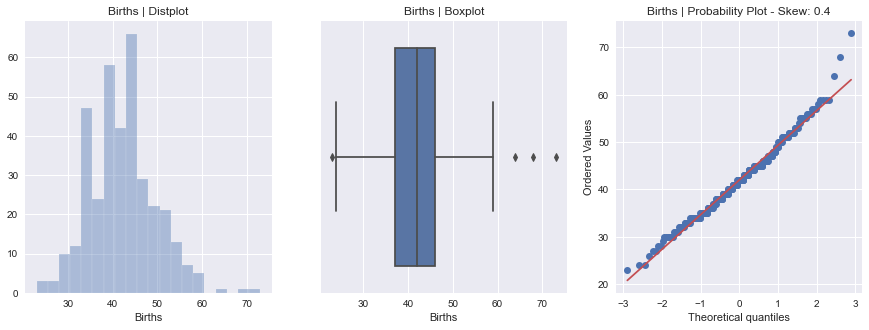

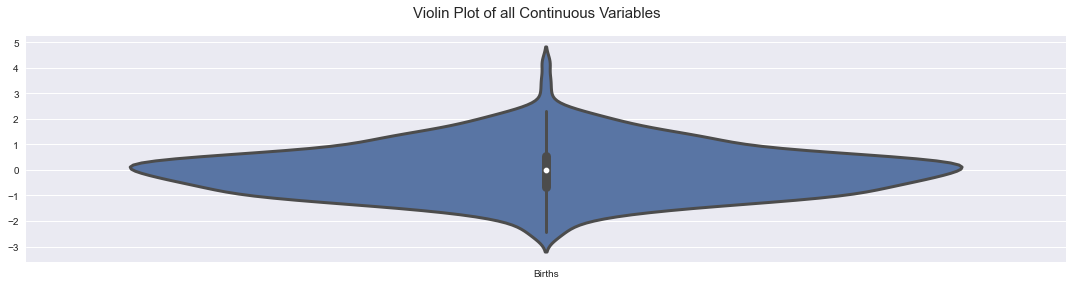

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 1.948

 ###################### VISUALIZATION Completed ########################


In [6]:
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dff = AV.AutoViz(url)

# Analysis

In [7]:
df_B = pd.DataFrame(df.iloc[:,-1])
df_T = pd.DataFrame(df.iloc[:,-1])
df_B.head()

,Births
0,35
1,32
2,30
3,31
4,44


 - Convert DateTime to correct date object.

In [8]:
df_B['DateTime'] = pd.to_datetime(df['Date'])
df_B['DateTime'].head()

0   1959-01-01
1   1959-01-02
2   1959-01-03
3   1959-01-04
4   1959-01-05
Name: DateTime, dtype: datetime64[ns]

 - Add Year

In [9]:
import datetime

df_B['Year'] = df_B['DateTime'].dt.year
df_B.head()

,Births,DateTime,Year
0,35,1959-01-01,1959
1,32,1959-01-02,1959
2,30,1959-01-03,1959
3,31,1959-01-04,1959
4,44,1959-01-05,1959


-  Add Month

In [10]:
import datetime

df_B['Month'] = df_B['DateTime'].dt.month
df_B.head()

,Births,DateTime,Year,Month
0,35,1959-01-01,1959,1
1,32,1959-01-02,1959,1
2,30,1959-01-03,1959,1
3,31,1959-01-04,1959,1
4,44,1959-01-05,1959,1


 - Add Day

In [11]:
import datetime

df_B['Day'] = df_B['DateTime'].dt.day
df_B.head()

,Births,DateTime,Year,Month,Day
0,35,1959-01-01,1959,1,1
1,32,1959-01-02,1959,1,2
2,30,1959-01-03,1959,1,3
3,31,1959-01-04,1959,1,4
4,44,1959-01-05,1959,1,5


# a)Plot data

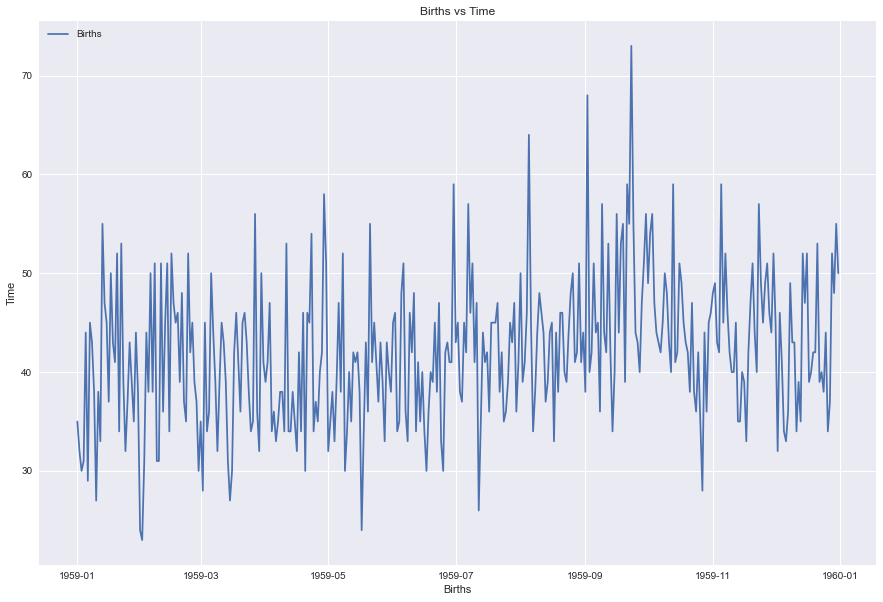

In [12]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_B['DateTime'], df_B['Births'], label = 'Births')

plt.title("Births vs Time")
plt.xlabel('Births')
plt.ylabel('Time')
plt.legend(loc=2)
plt.show()

 - ## b)Simple Moving Average (SMA)  moving averages ( n=4 and n=5)

In [13]:
for i in range(df.shape[0]-3):   
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)

df.head(5)

,Date,Births,SMA_4
0,1959-01-01,35,NaN
1,1959-01-02,32,NaN
2,1959-01-03,30,NaN
3,1959-01-04,31,32.0
4,1959-01-05,44,34.2


In [14]:
for i in range(df.shape[0]-4):   
    df.loc[df.index[i+4],'SMA_5'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1] +df.iloc[i+4,1])/5),1)

df.head(5)

,Date,Births,SMA_4,SMA_5
0,1959-01-01,35,NaN,NaN
1,1959-01-02,32,NaN,NaN
2,1959-01-03,30,NaN,NaN
3,1959-01-04,31,32.0,NaN
4,1959-01-05,44,34.2,34.4


In [15]:
df_B['SMA_4'] = df['SMA_4']
df_B.head()

,Births,DateTime,Year,Month,Day,SMA_4
0,35,1959-01-01,1959,1,1,NaN
1,32,1959-01-02,1959,1,2,NaN
2,30,1959-01-03,1959,1,3,NaN
3,31,1959-01-04,1959,1,4,32.0
4,44,1959-01-05,1959,1,5,34.2


In [16]:
df_B['SMA_5'] = df['SMA_5']
df_B.head()

,Births,DateTime,Year,Month,Day,SMA_4,SMA_5
0,35,1959-01-01,1959,1,1,NaN,NaN
1,32,1959-01-02,1959,1,2,NaN,NaN
2,30,1959-01-03,1959,1,3,NaN,NaN
3,31,1959-01-04,1959,1,4,32.0,NaN
4,44,1959-01-05,1959,1,5,34.2,34.4


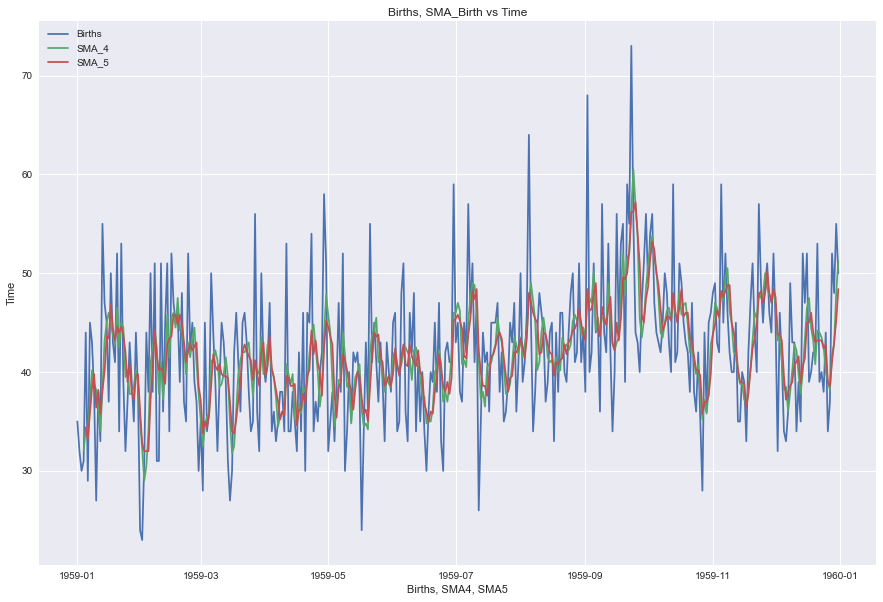

In [17]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_B['DateTime'], df_B['Births'], label = 'Births')
plt.plot(df_B['DateTime'], df_B['SMA_4'], label = 'SMA_4')
plt.plot(df_B['DateTime'], df_B['SMA_5'], label = 'SMA_5')

plt.title("Births, SMA_Birth vs Time")
plt.xlabel('Births, SMA4, SMA5')
plt.ylabel('Time')
plt.legend(loc=2)
plt.show()

### (c) Exponential Moving Averages

In [18]:
df_B['EMA'] = df_B.iloc[:,0].ewm(span=40,adjust=False).mean()
df_B.head()

,Births,DateTime,Year,Month,Day,SMA_4,SMA_5,EMA
0,35,1959-01-01,1959,1,1,NaN,NaN,35.000000
1,32,1959-01-02,1959,1,2,NaN,NaN,34.853659
2,30,1959-01-03,1959,1,3,NaN,NaN,34.616895
3,31,1959-01-04,1959,1,4,32.0,NaN,34.440461
4,44,1959-01-05,1959,1,5,34.2,34.4,34.906780


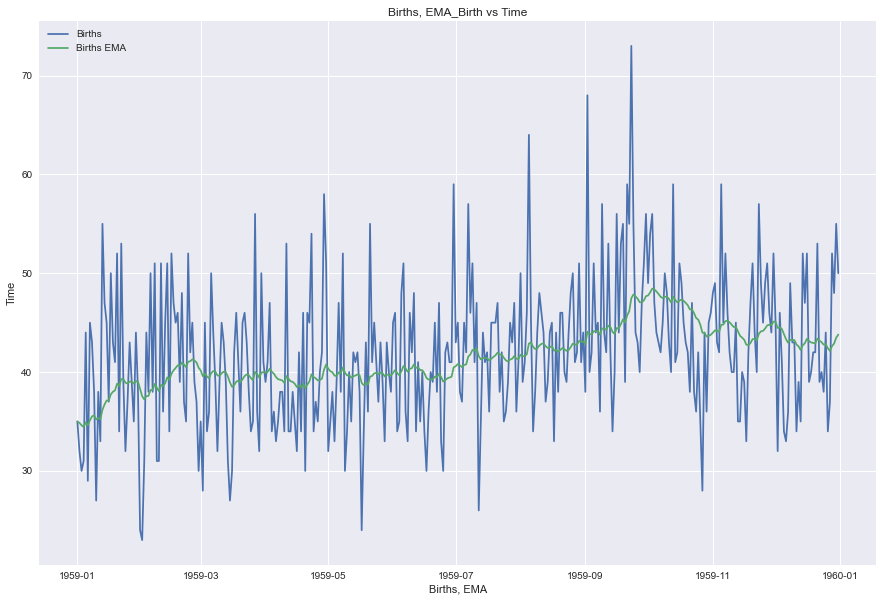

In [19]:
plt.figure(figsize = [15,10])
plt.grid(True)


plt.plot(df_B['DateTime'], df_B['Births'], label = 'Births')
plt.plot(df_B['DateTime'], df_B['EMA'], label = 'Births EMA')

plt.title("Births, EMA_Birth vs Time")
plt.xlabel('Births, EMA')
plt.ylabel('Time')
plt.legend(loc = 2)
plt.show()

 ### (d) Cumulative Moving Average ( consider minimum periods as 2)

In [20]:
df_B['CMA_2'] = df_T.expanding(min_periods=2).mean()
df_B

,Births,DateTime,Year,Month,Day,SMA_4,SMA_5,EMA,CMA_2
0,35,1959-01-01,1959,1,1,NaN,NaN,35.000000,NaN
1,32,1959-01-02,1959,1,2,NaN,NaN,34.853659,33.500000
2,30,1959-01-03,1959,1,3,NaN,NaN,34.616895,32.333333
3,31,1959-01-04,1959,1,4,32.0,NaN,34.440461,32.000000
4,44,1959-01-05,1959,1,5,34.2,34.4,34.906780,34.400000
...,...,...,...,...,...,...,...,...,...
360,37,1959-12-27,1959,12,27,38.2,38.6,42.142756,41.878116
361,52,1959-12-28,1959,12,28,41.8,41.0,42.623597,41.906077
362,48,1959-12-29,1959,12,29,42.8,43.0,42.885861,41.922865
363,55,1959-12-30,1959,12,30,48.0,45.2,43.476795,41.958791


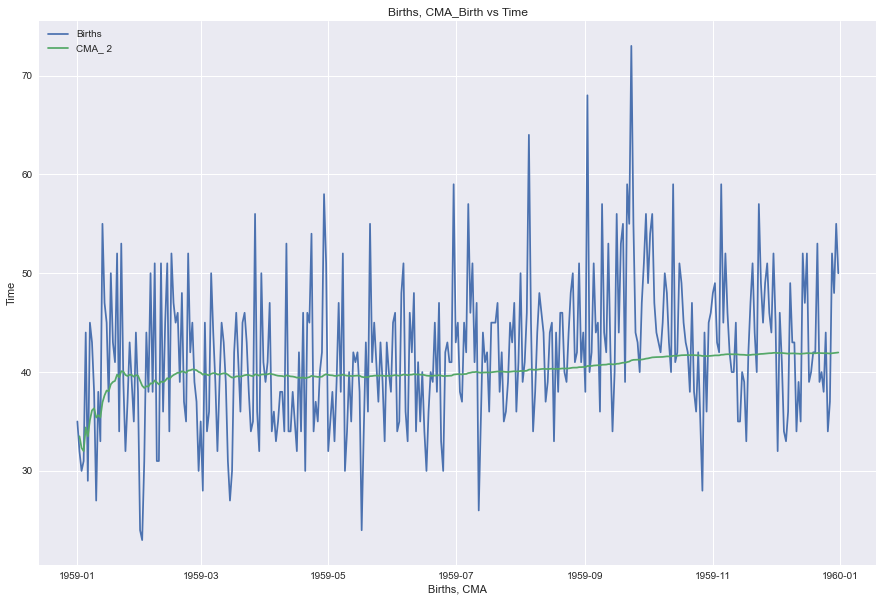

In [21]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_B['DateTime'], df_B['Births'], label = 'Births')
plt.plot(df_B['DateTime'], df_B['CMA_2'], label = 'CMA_ 2')

plt.title("Births, CMA_Birth vs Time")
plt.xlabel('Births, CMA')
plt.ylabel('Time')
plt.legend(loc=2)
plt.show()

### GROUPBY Month

In [22]:
df_month = df_B.groupby(['Month']).mean()
df_month

,Births,Year,Day,SMA_4,SMA_5,EMA,CMA_2
Month,,,,,,,
1,39.129032,1959.0,16.0,39.825000,40.037037,37.052539,37.450347
2,41.000000,1959.0,14.5,40.907143,40.850000,39.512960,39.444985
3,39.290323,1959.0,16.0,38.870968,38.903226,39.567961,39.710399
4,39.833333,1959.0,15.5,39.383333,39.246667,39.329129,39.590727
5,38.967742,1959.0,16.0,39.567742,39.683871,39.670710,39.621139
6,40.400000,1959.0,15.5,39.873333,39.780000,39.866703,39.679173
7,41.935484,1959.0,16.0,42.409677,42.419355,41.394795,39.961110
8,43.580645,1959.0,16.0,43.390323,43.361290,42.472477,40.320250
9,48.200000,1959.0,15.5,47.766667,47.746667,45.218176,40.904259


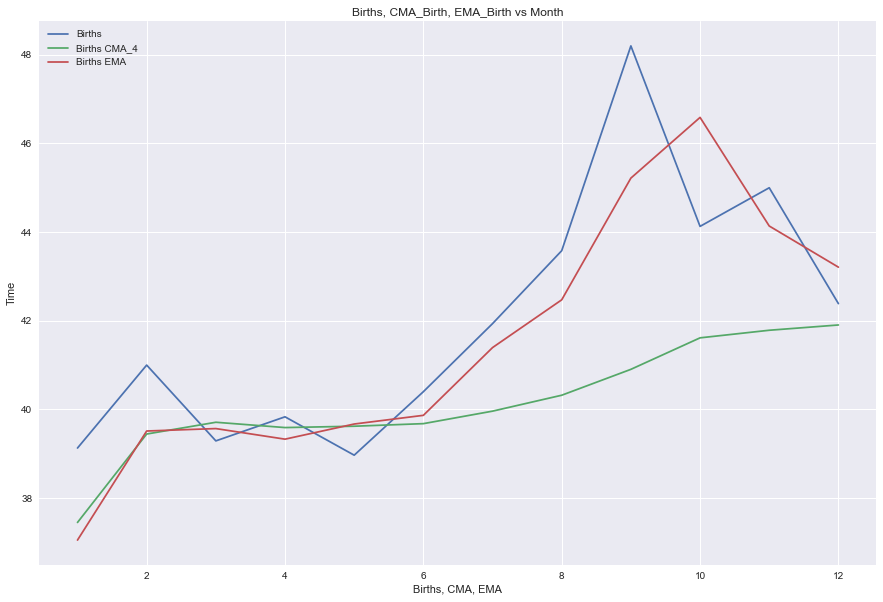

In [23]:
plt.figure(figsize = [15,10])
plt.grid(True)


plt.plot(df_month['Births'], label = 'Births')
plt.plot(df_month['CMA_2'], label = 'Births CMA_4')
plt.plot(df_month['EMA'], label = 'Births EMA')

plt.title("Births, CMA_Birth, EMA_Birth vs Month")
plt.xlabel('Births, CMA, EMA')
plt.ylabel('Time')
plt.legend(loc = 2)
plt.show()

### Culmination of Moving Windows

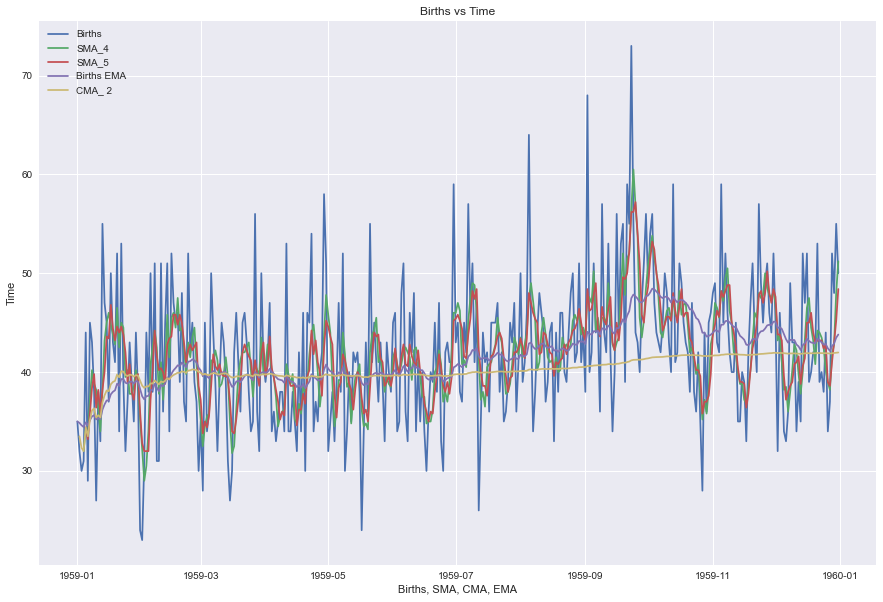

In [24]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_B['DateTime'], df_B['Births'], label = 'Births')

plt.plot(df_B['DateTime'], df_B['SMA_4'], label = 'SMA_4')
plt.plot(df_B['DateTime'], df_B['SMA_5'], label = 'SMA_5')

plt.plot(df_B['DateTime'], df_B['EMA'], label = 'Births EMA')

plt.plot(df_B['DateTime'], df_B['CMA_2'], label = 'CMA_ 2')

plt.title("Births vs Time")
plt.xlabel('Births, SMA, CMA, EMA')
plt.ylabel('Time')

plt.legend(loc=2)
plt.show()

## Zoom all the plots

- #### Births, SMA

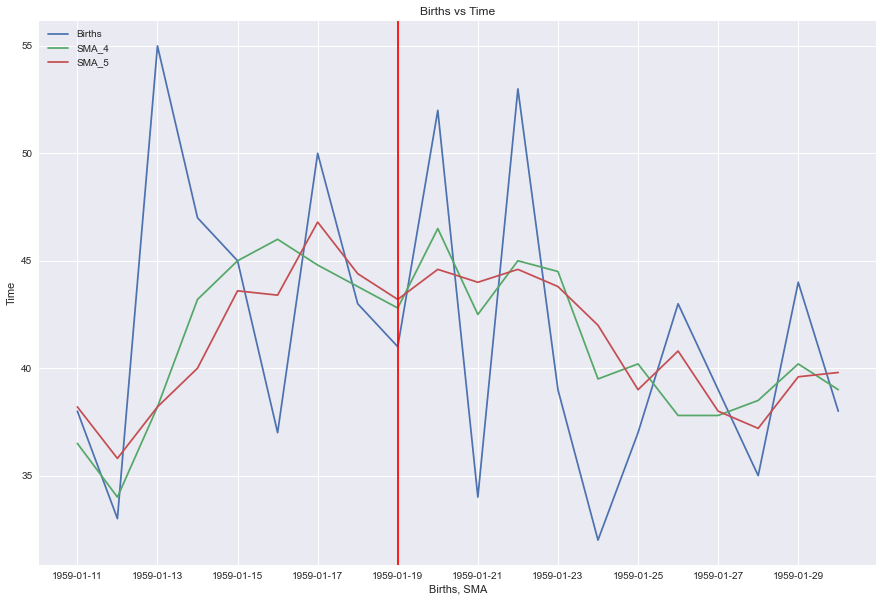

In [25]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_B['DateTime'][10:30], df_B['Births'][10:30], label = 'Births')

plt.plot(df_B['DateTime'][10:30], df_B['SMA_4'][10:30], label = 'SMA_4')
plt.plot(df_B['DateTime'][10:30], df_B['SMA_5'][10:30], label = 'SMA_5')

plt.axvline(x="1959-01-19", color="red")

plt.title("Births vs Time")
plt.xlabel('Births, SMA')
plt.ylabel('Time')

plt.legend(loc=2)
plt.show()

 - #### Births, EMA, CMA

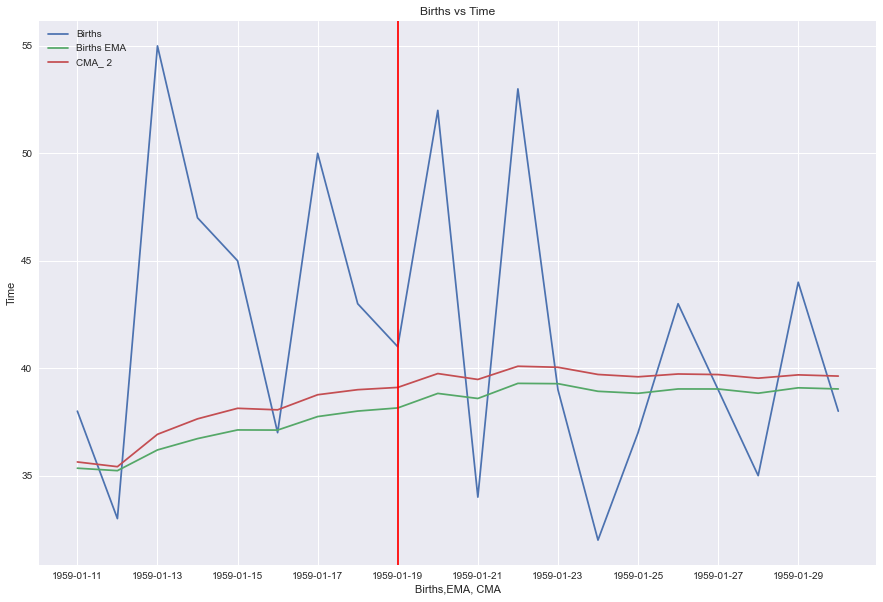

In [26]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_B['DateTime'][10:30], df_B['Births'][10:30], label = 'Births')

plt.plot(df_B['DateTime'][10:30], df_B['EMA'][10:30], label = 'Births EMA')

plt.plot(df_B['DateTime'][10:30], df_B['CMA_2'][10:30], label = 'CMA_ 2')

plt.axvline(x="1959-01-19", color="red")

plt.title("Births vs Time")
plt.xlabel('Births,EMA, CMA')
plt.ylabel('Time')

plt.legend(loc=2)
plt.show()

 - #### Combined

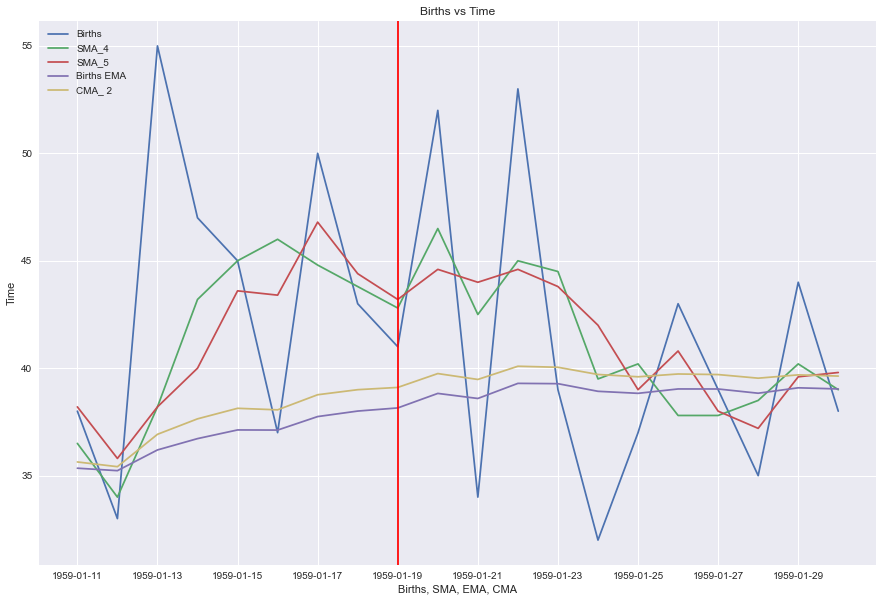

In [27]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_B['DateTime'][10:30], df_B['Births'][10:30], label = 'Births')

plt.plot(df_B['DateTime'][10:30], df_B['SMA_4'][10:30], label = 'SMA_4')
plt.plot(df_B['DateTime'][10:30], df_B['SMA_5'][10:30], label = 'SMA_5')

plt.plot(df_B['DateTime'][10:30], df_B['EMA'][10:30], label = 'Births EMA')

plt.plot(df_B['DateTime'][10:30], df_B['CMA_2'][10:30], label = 'CMA_ 2')

plt.axvline(x="1959-01-19", color="red")

plt.title("Births vs Time")
plt.xlabel('Births, SMA, EMA, CMA')
plt.ylabel('Time')

plt.legend(loc=2)
plt.show()

## Demonstrate predictions with the data

In [28]:
dff = df_B[df_B["DateTime"] == "1959-01-19"]
dff

,Births,DateTime,Year,Month,Day,SMA_4,SMA_5,EMA,CMA_2
18,41,1959-01-19,1959,1,19,42.8,43.2,38.150883,39.105263


 - Here the actual Birth is 41.
 - The Simple Moving average (Window = 4) gave value as 42.8
 - The Simple Moving average (Window = 5) gave value as 43.2
 - The Exponenetial Moving average gave value as 38.15
 - The Cumulative Moving average (Window = 2) gave value as 39.10

In [29]:
import numpy

diff_arr = np.subtract(dff["Births"], dff["SMA_4"])
sq_arr = np.square(diff_arr)
mse = sq_arr.mean()
mse

3.2399999999999896

The MSE between Simple Moving average (Window = 4) and Actual Birth is 3.22

In [30]:
diff_arr = np.subtract(dff["Births"], dff["SMA_5"])
sq_arr = np.square(diff_arr)
mse = sq_arr.mean()
mse

4.840000000000012

The MSE between Simple Moving average (Window = 5) and Actual Birth is 4.84

In [31]:
diff_arr = np.subtract(dff["Births"], dff["EMA"])
sq_arr = np.square(diff_arr)
mse = sq_arr.mean()
mse

8.117466908027192

The MSE between Exponenetial Moving average  and Actual Birth is 8.117

In [32]:
diff_arr = np.subtract(dff["Births"], dff["CMA_2"])
sq_arr = np.square(diff_arr)
mse = sq_arr.mean()
mse

3.5900277008310137

The MSE between and Actual Birth is 3.59

## Prediction

In [37]:
dff = df_B["Births"][0:100]
dff_val = df_B["Births"][100:200]

<AxesSubplot:>

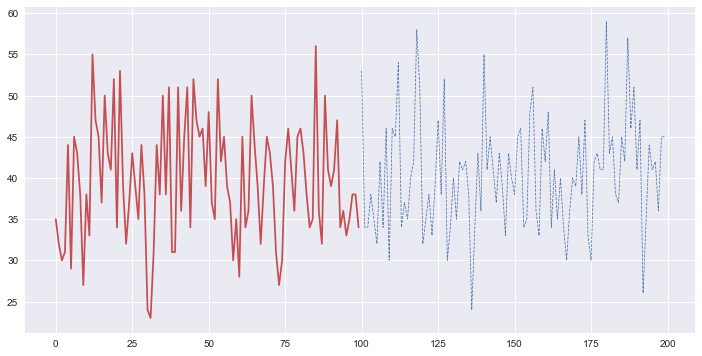

In [38]:
ax = dff.plot(color='C2', linewidth=1.75, figsize=(12,6))
dff_val.plot(ax=ax, color='C0', linestyle='dashed', linewidth=0.75)

#### Naive Predicition

In [39]:
naive_pred = pd.Series(dff, index=dff_val.index)

#### Seasonal Prediction

In [40]:
seasonal_pred = pd.Series(dff.values,index=dff_val.index)

#### Predictions with the data

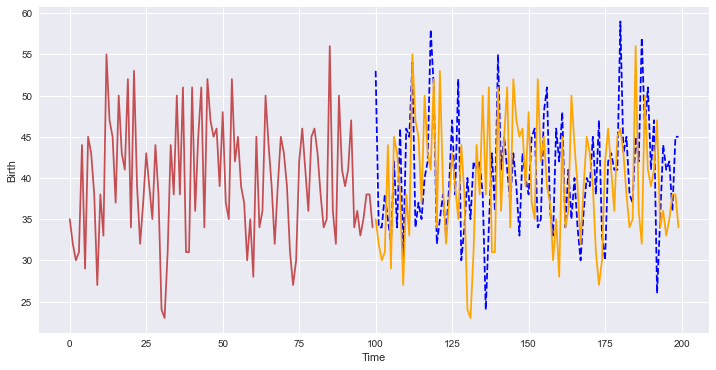

In [41]:
ax = dff.plot(color='C2', linewidth=1.75, figsize=(12,6))
dff_val.plot(ax=ax, color='blue', linestyle='dashed', linewidth=1.75)

ax.set_xlabel('Time')
ax.set_ylabel('Birth')

naive_pred.plot(ax=ax, color='red')
seasonal_pred.plot(ax=ax, color='orange')

plt.show()